# Import Data

In [3]:
import pandas as pd
df = pd.read_csv('netflix_shows.csv')
df.head()

,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,Jailbirds New Orleans,NaN,United States,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
3,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,24-Sep-21,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


# Validate Dataset

In [2]:
df.dtypes

title           object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [3]:
df.isnull().sum()

title             0
cast            350
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [6]:
description_lengths = df['description'].str.len()
description_lengths.describe()

count    2662.000000
mean      142.588279
std         9.474084
min        82.000000
25%       140.000000
50%       146.000000
75%       149.000000
max       243.000000
Name: description, dtype: float64

In [ ]:
# More validation  . . . 

In [1]:
# Importing

import nltk
#nltk.download('punkt')
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /home/devel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
# making a function to create frequency distributions of words - code from https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3

def frequencyDist(words):
    FreqDist(words)

    ## Creating FreqDist for whole BoW, keeping the 20 most common tokens
    all_fdist = FreqDist(words).most_common(20)

    ## Conversion to Pandas series via Python Dictionary for easier plotting
    all_fdist = pd.Series(dict(all_fdist))

    ## Setting figure, ax into variables
    fig, ax = plt.subplots(figsize=(10,10))

    ## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
    all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    all_plot.set(xlabel ="Words")
    plt.xticks(rotation=30);
    
    

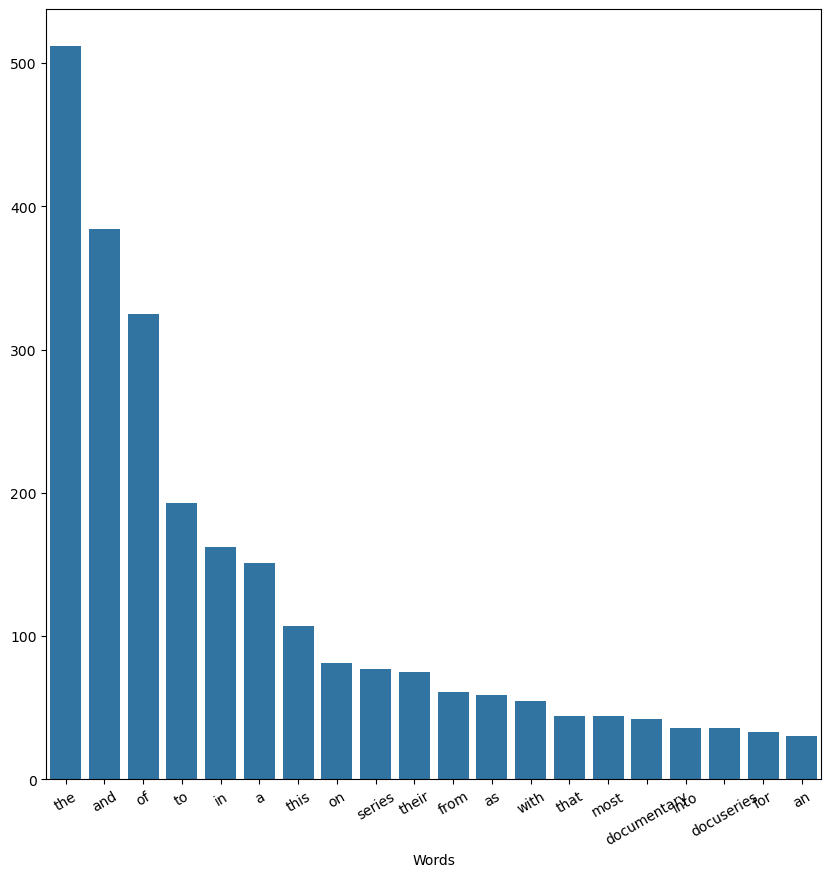

In [61]:
# making a frequency distribution for all the words in the descriptions of docuseries
words = ""
for index in range(df.shape[0]):
    if "Docuseries" in df.loc[index][7]:
        words += df.loc[index][8]
words = words.split()

frequencyDist(words)

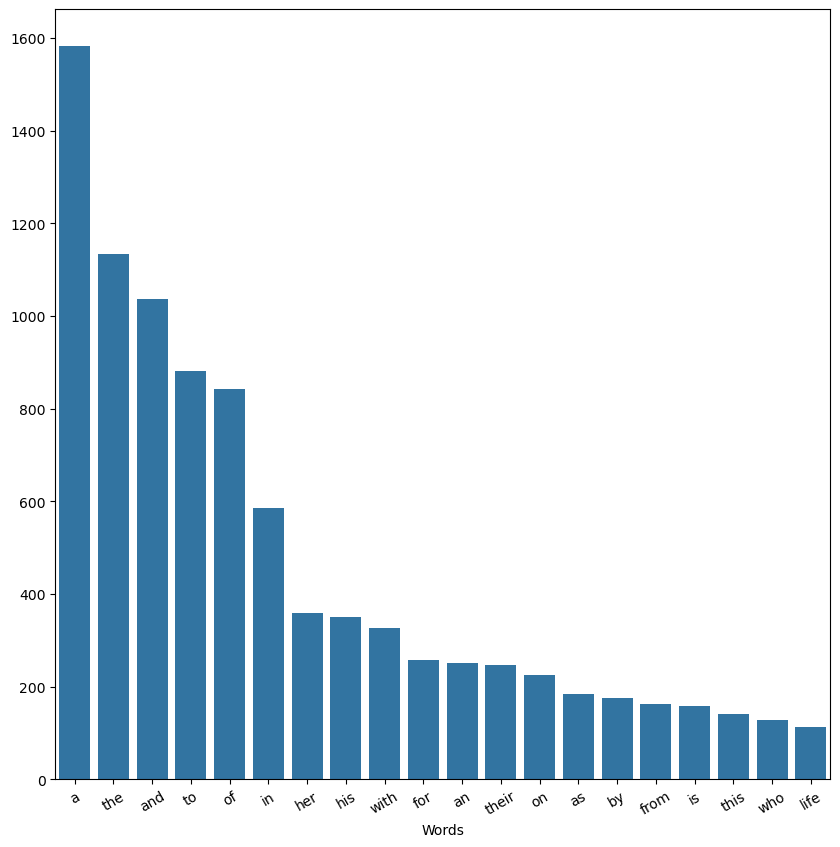

In [62]:
# making a frequency distribution for all the words in the descriptions of International TV Shows

words = ""
for index in range(df.shape[0]):
    if "International TV Shows" in df.loc[index][7]:
        words += df.loc[index][8]
words = words.split()

frequencyDist(words)

In [66]:
# updated function to filter word list and then plot a freqency distribution

#nltk.download('stopwords')

def filteredFrequencyDist(words):
    ## Storing NLTK English stop word list + conainter for results
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append('–')
    filtered_words = []

    ## Check if token in stop word list before adding to new list
    for word in words:
        if word in stopwords:
            pass
        else:
            filtered_words.append(word)
    
    FreqDist(filtered_words)

    ## Creating FreqDist for whole BoW, keeping the 20 most common tokens
    all_fdist = FreqDist(filtered_words).most_common(20)

    ## Conversion to Pandas series via Python Dictionary for easier plotting
    all_fdist = pd.Series(dict(all_fdist))

    ## Setting figure, ax into variables
    fig, ax = plt.subplots(figsize=(10,10))

    ## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
    all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    all_plot.set(xlabel ="Words")
    plt.xticks(rotation=30);

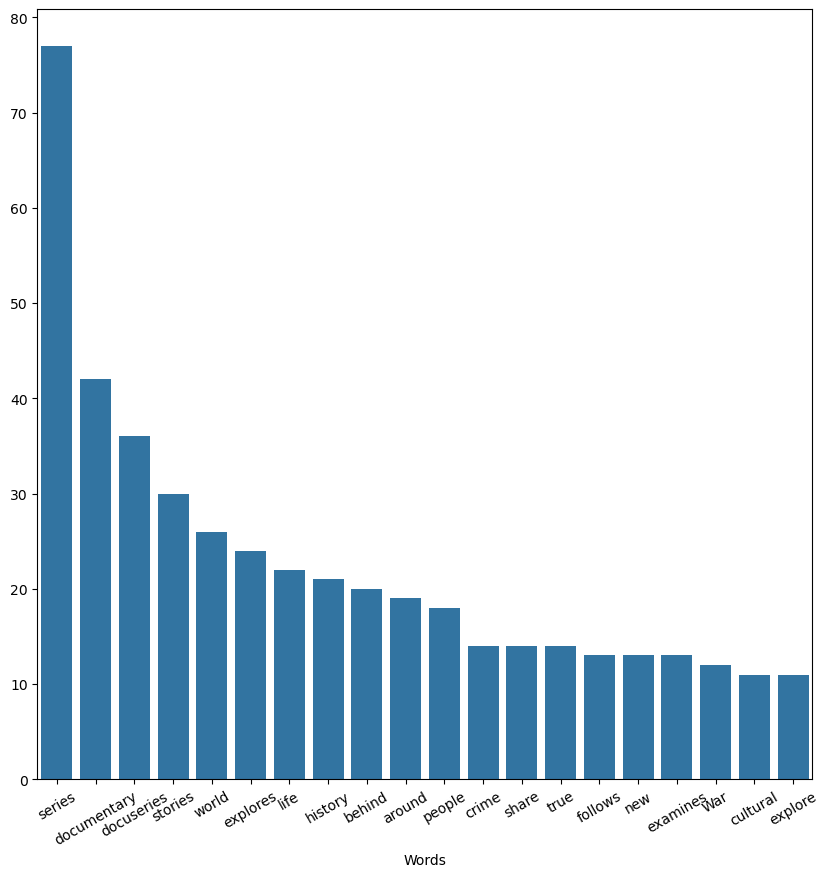

In [67]:
# remaking a frequency distribution for all the words in the descriptions of docuseries
words = ""
for index in range(df.shape[0]):
    if "Docuseries" in df.loc[index][7]:
        words += df.loc[index][8]
words = words.split()

filteredFrequencyDist(words)

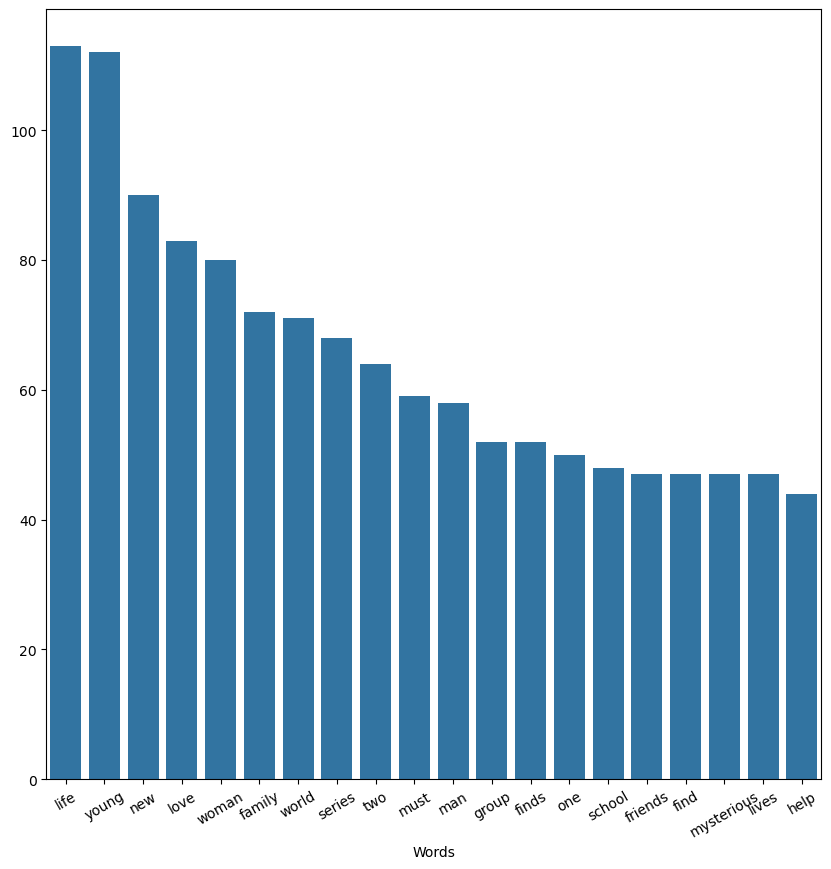

In [68]:
# remaking a filtered frequency distribution for all the words in the descriptions of International TV Shows

words = ""
for index in range(df.shape[0]):
    if "International TV Shows" in df.loc[index][7]:
        words += df.loc[index][8]
words = words.split()

filteredFrequencyDist(words)